In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/pervej.hosen/Downloads/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate analysis 

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# Lets see the data is in normal distribution or not

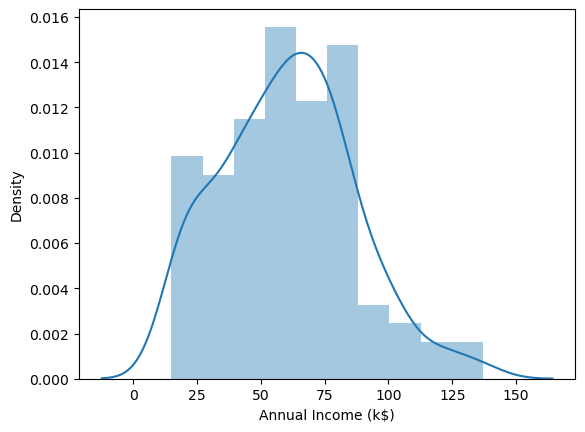

In [4]:
sns.distplot(df['Annual Income (k$)']);

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

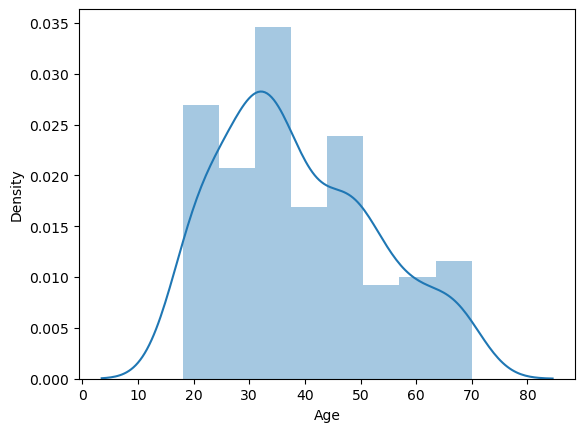

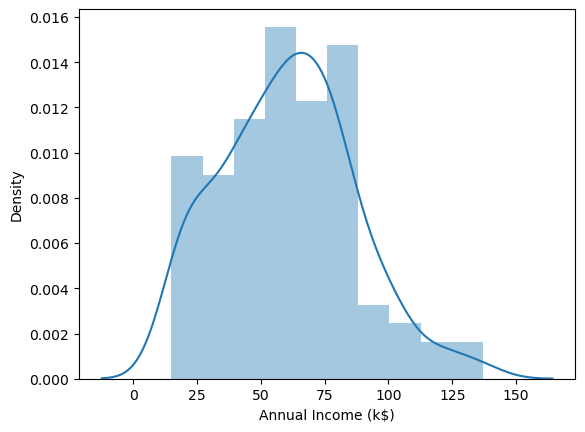

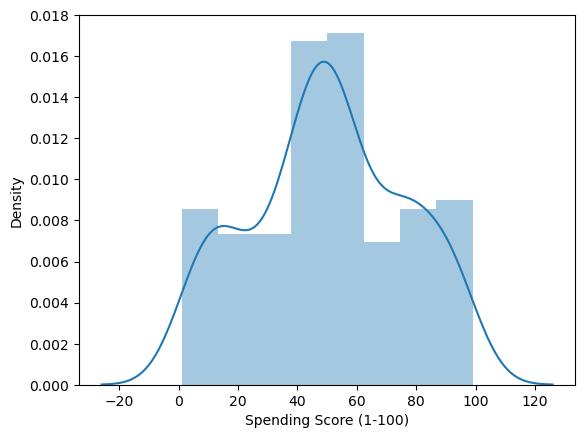

In [6]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

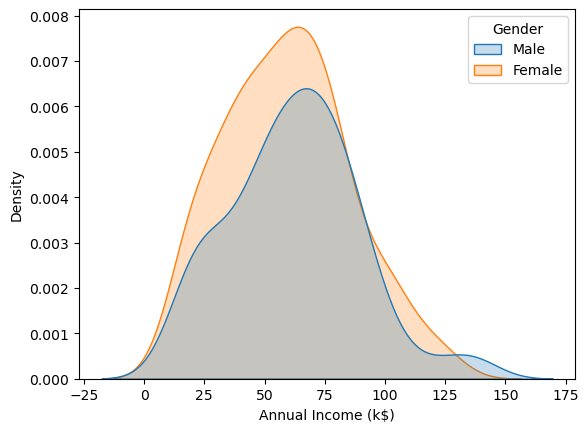

In [7]:
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender');

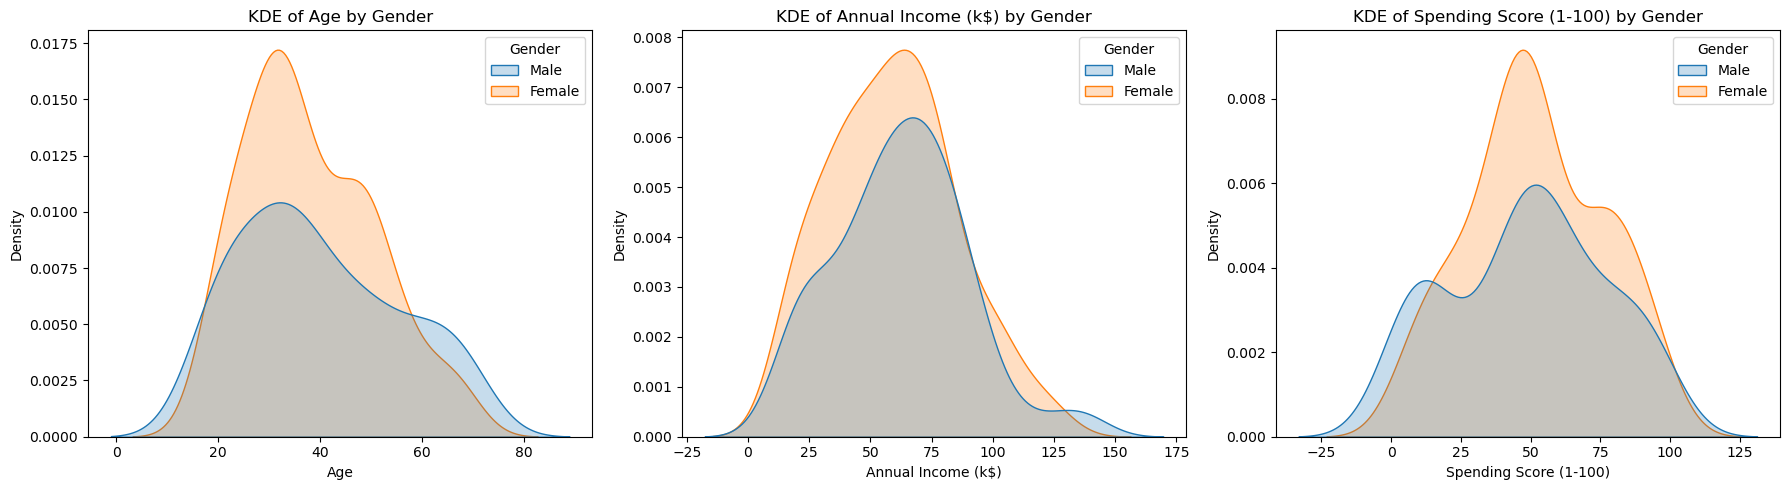

In [8]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
n_cols = len(columns)

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, n_cols, figsize=(6 * n_cols, 5))  # Adjust the size as needed

for i, col in enumerate(columns):
    sns.kdeplot(data=df, x=col, shade=True, hue='Gender', ax=axes[i])
    axes[i].set_title(f'KDE of {col} by Gender')  # Optional: Adds a title to each plot

plt.tight_layout()  # Adjusts the plots to fit into the figure area nicely
plt.show()

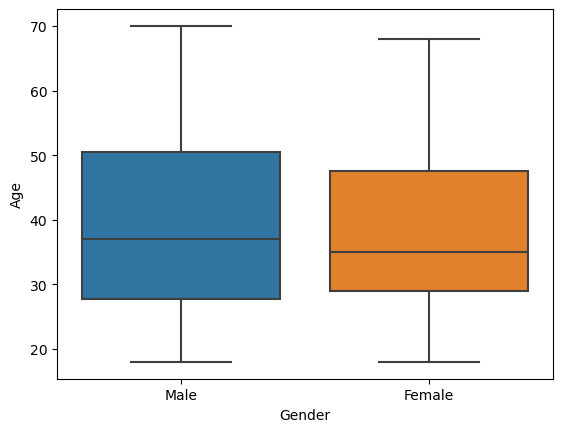

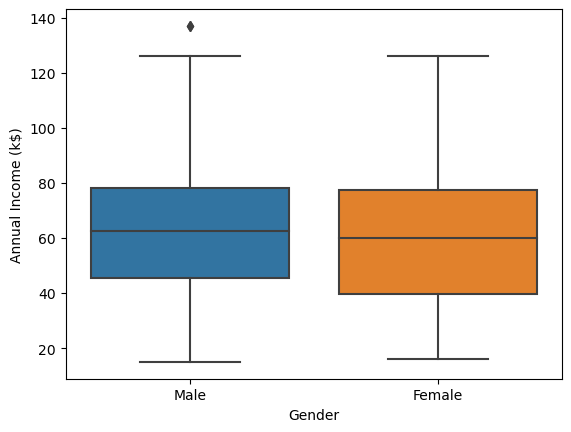

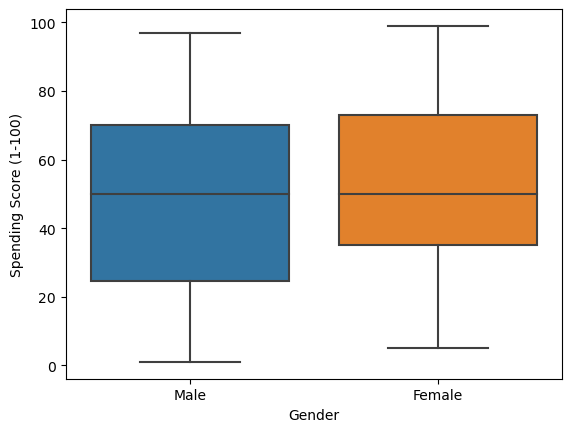

In [9]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x ='Gender', y= df[i])

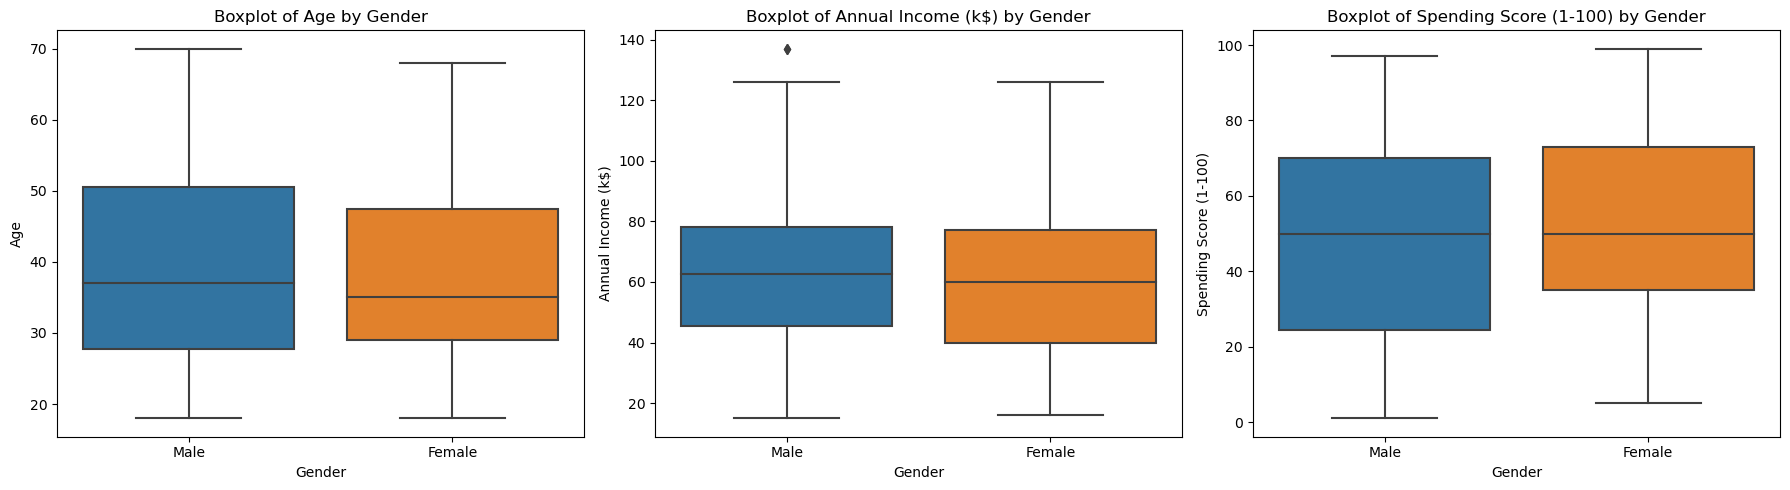

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
n_cols = len(columns)

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, n_cols, figsize=(6 * n_cols, 5))  # Adjust the size as needed

for i, col in enumerate(columns):
    sns.boxplot(data=df, x='Gender', y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Gender')  # Optional: Adds a title to each plot

plt.tight_layout()  # Adjusts the plots to fit into the figure area nicely
plt.show()

In [11]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

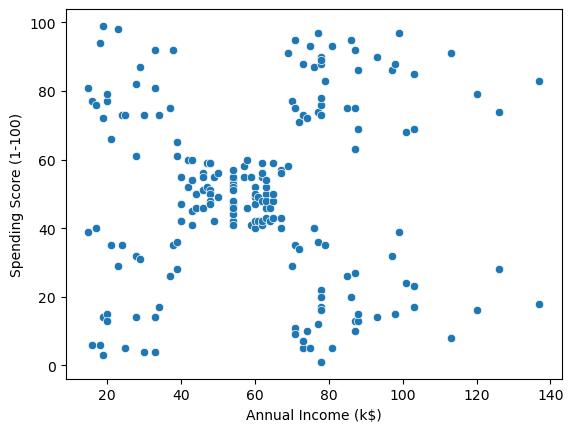

In [13]:
sns.scatterplot(data=df, 
                x='Annual Income (k$)', 
                y='Spending Score (1-100)');

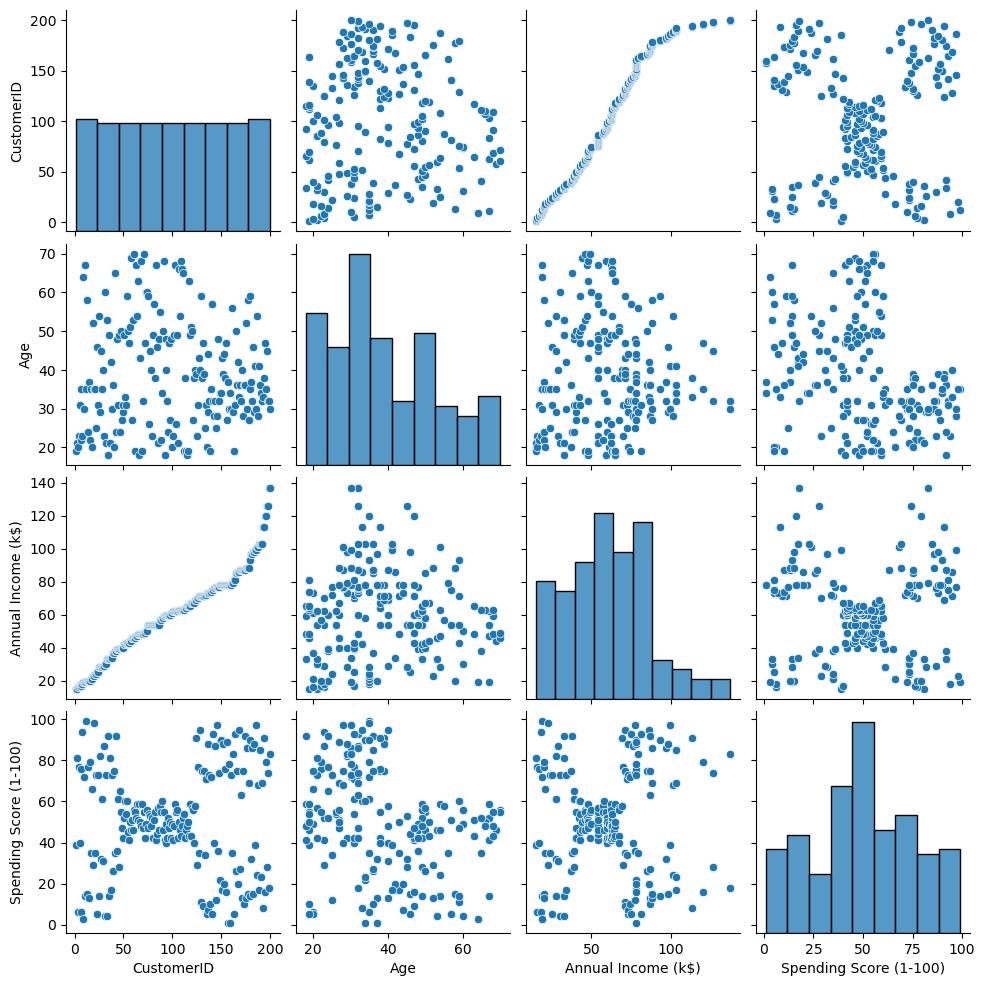

In [14]:
sns.pairplot(data=df);

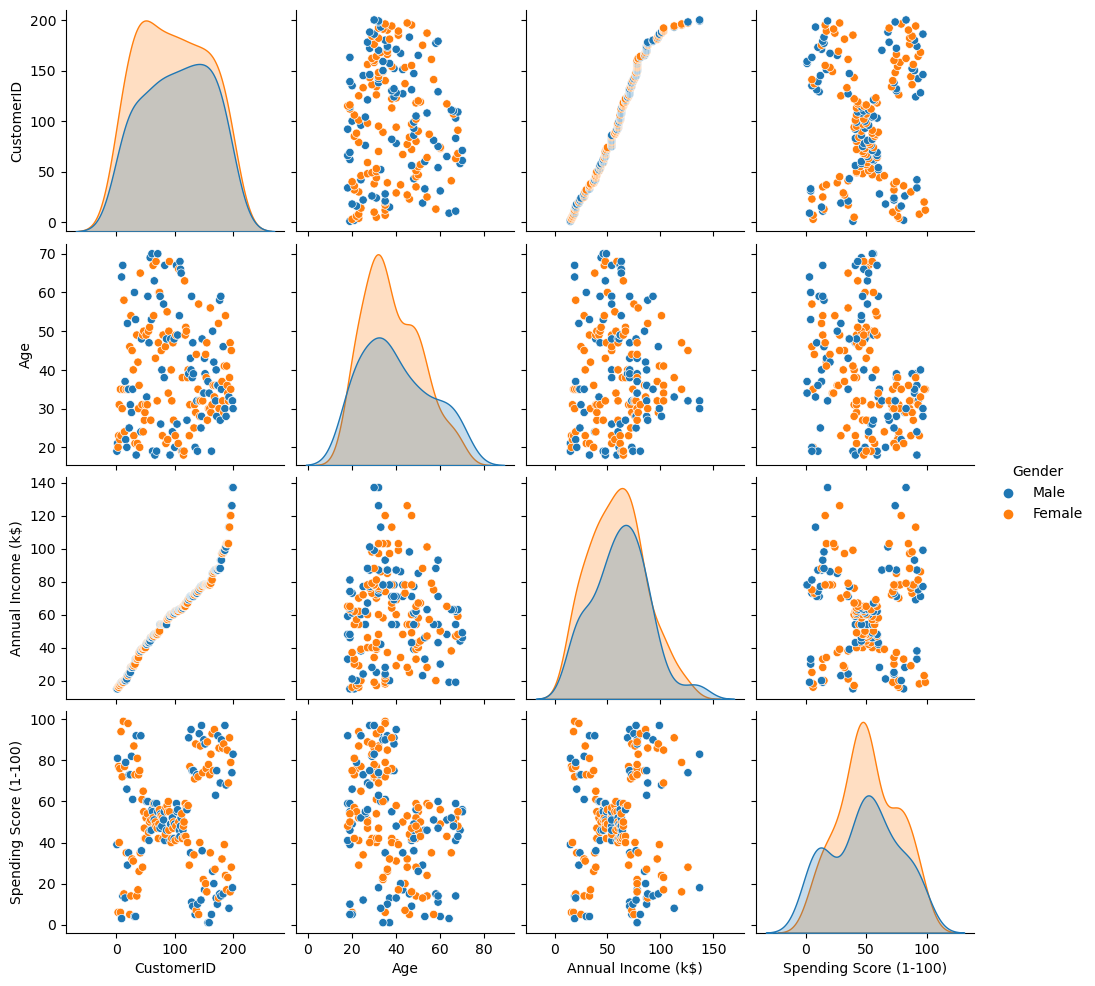

In [15]:
#df=df.drop('CustomerID', axis=1)
sns.pairplot(data=df, hue='Gender');

In [16]:
df.groupby('Gender')[['Age', 
                      'Annual Income (k$)', 
                      'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


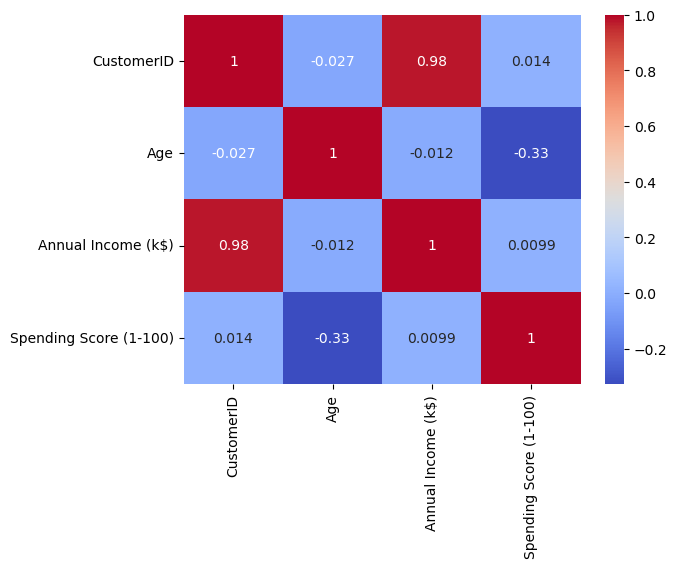

In [17]:
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = sns.heatmap(numeric_df.corr(), 
                                 annot=True, 
                                 cmap='coolwarm')


# Clustering- Univariate, Bivariate & Multivariate

In [18]:
clustering1= KMeans(n_clusters=3)

In [19]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [20]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [21]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [22]:
df['Income Cluster'].value_counts()

Income Cluster
2    90
0    74
1    36
Name: count, dtype: int64

In [23]:
clustering1.inertia_

23517.33093093093

In [24]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [25]:
intertia_scores

[137277.28,
 48660.88888888889,
 23517.33093093093,
 13278.112713472485,
 8481.49619047619,
 5050.904761904762,
 3984.907059314954,
 2822.4996947496948,
 2189.2563714063717,
 1779.7638877462405]

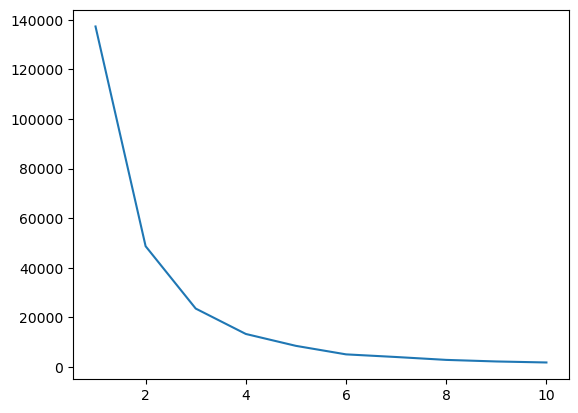

In [26]:
plt.plot(range(1,11),intertia_scores);

In [27]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [28]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 
                              'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


# Bivariate Clustering

In [29]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,4


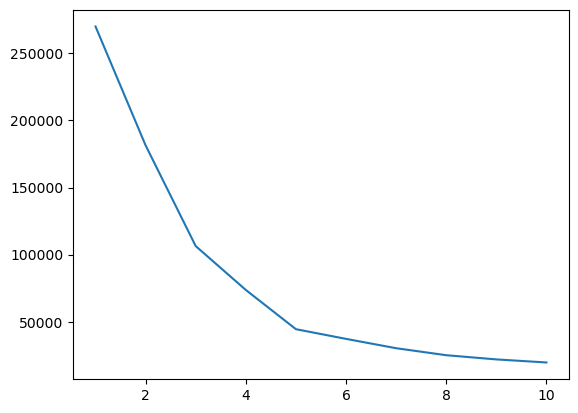

In [30]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2);

In [31]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

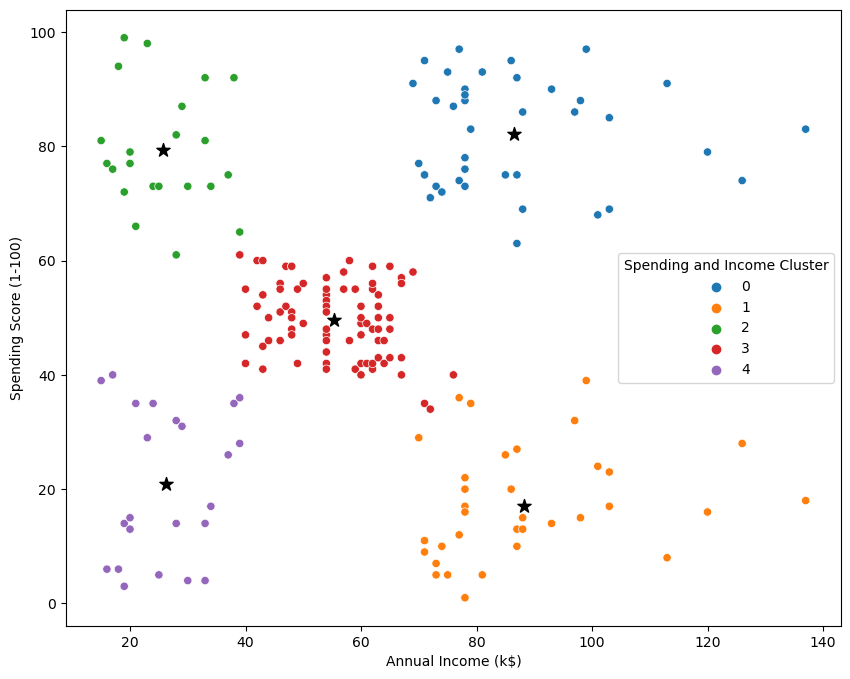

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [33]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.457143,0.542857
2,0.590909,0.409091
3,0.592593,0.407407
4,0.608696,0.391304


In [34]:
mean_values = df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(mean_values)


                                   Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            32.692308           86.538462   
1                            41.114286           88.200000   
2                            25.272727           25.727273   
3                            42.716049           55.296296   
4                            45.217391           26.304348   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         82.128205  
1                                         17.114286  
2                                         79.363636  
3                                         49.518519  
4                                         20.913043  


# mulivariate clustering 

In [35]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,4


In [37]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,4,True
1,2,21,15,81,0,2,True
2,3,20,16,6,0,4,False
3,4,23,16,77,0,2,False
4,5,31,17,40,0,4,False


In [38]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [39]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [40]:
dff = scale.fit_transform(dff)

In [41]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


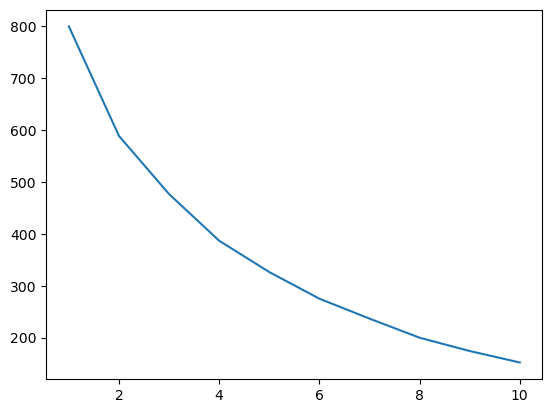

In [42]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [43]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,1,1


In [44]:
df.to_csv('Clustering.csv')